In [109]:
import itertools as it
#from math import exp,sqrt,pi
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

In [69]:
dataset = generate_dataset()


In [173]:
### generate dataset and visualize it
def generate_dataset():
    Y = list(it.product([-1,1],repeat = 9))
    dataset = []
    for subdata in Y:
        sub = np.asarray(subdata)
        sub = np.reshape(sub,(3,3))
        dataset.append(sub)
    return dataset
def visualize_data(data):
    print('--------------')
    for i in range(data.shape[0]):
        line = '|'
        for j in range(data.shape[1]):
            if data[i][j] == -1 :
                line = line + 'x'
            else :
                line = line + 'o'
        line = line +'|'
        print(line)
    print('---------------')
        

In [174]:
### create model for evidence
def M0(theta,data):
        
    return 1/512

def M1(theta,data):
    ## data is just one grid
    p = 1
    axis = [-1,0,1]
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            prob = 1 / (1+ np.exp(- data[i][j]*theta*axis[j]))
            p = p * prob
    return p

def M2(theta,data):
    p = 1
    axis = [-1,0,1]
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            prob = 1 / (1+ np.exp(-data[i][j]*(theta[0]*axis[i]+ theta[1]*axis[j])))
            p = p * prob
    return p
                        
def M3(theta,data):
    p = 1
    axis = [-1,0,1]
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            prob = 1 / (1+ np.exp(-data[i][j]*(theta[0]*axis[i]+ theta[1]*axis[j] + theta[2])))
            p = p * prob
    return p
        


In [224]:
### generate theta
def generate_parameter(model,sigma,mu,num_sample):
    if model is 'M1':
        Sigma = sigma
        Mu = mu
        theta = np.random.normal(Mu, Sigma, num_sample)
        return theta
    elif model is 'M2':
        Sigma = np.eye(2)*sigma
        Mu = np.zeros(2) + mu
        theta = np.random.multivariate_normal(Mu, Sigma, num_sample)
        return theta
    elif model is 'M3':
        Sigma = np.eye(3) * sigma
        Mu = np.zeros(3) + mu
        theta = np.random.multivariate_normal(Mu, Sigma, num_sample)
        return theta
    elif model is 'M0':
        return 0
    else :
        print('No such model!')
        return 

In [225]:
def compute_evidence(model,data,num_sample,theta):
    #theta = generate_parameter(model,sigma,mean,num_sample)
    evidence = 0
    for i in range(num_sample): 
        if model == 'M0':
            p = M0(theta,data)
            
        elif model == 'M1':
            p = M1(theta[i],data)
            
        elif model == 'M2':
            p = M2(theta[i,:],data)
        elif model == 'M3':
            p = M3(theta[i,:],data)
        else :
            print('No such model!')
        evidence = evidence + p
    return evidence / num_sample

In [219]:
sigma = 1000
mu = 0

evidence = np.zeros((4,512))
models = ['M0','M1','M2','M3']
num_sample = 10000
theta_M0 = generate_parameter(models[0],sigma,mu,num_sample)
theta_M1 = generate_parameter(models[1],sigma,mu,num_sample)
theta_M2 = generate_parameter(models[2],sigma,mu,num_sample)
theta_M3 = generate_parameter(models[3],sigma,mu,num_sample)
theta = [theta_M0,theta_M1,theta_M2,theta_M3]
for i in range(4) :
    for j in range(512):
        evidence[i][j] = compute_evidence(models[i],dataset[j],num_sample,theta[i])
        


In [220]:
L = order_set(evidence)

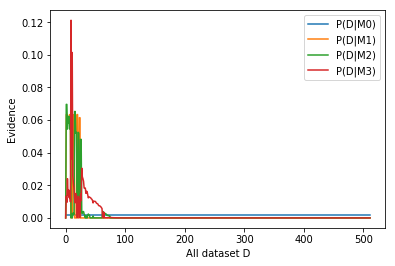

In [221]:

plt.figure()
plt.plot(evidence[0,L],label = 'P(D|M0)')
plt.plot(evidence[1,L],label = 'P(D|M1)')
plt.plot(evidence[2,L],label = 'P(D|M2)')
plt.plot(evidence[3,L],label = 'P(D|M3)')
plt.legend()
plt.xlabel('All dataset D')
plt.ylabel('Evidence')
plt.show()
#print(evidence[0,:])

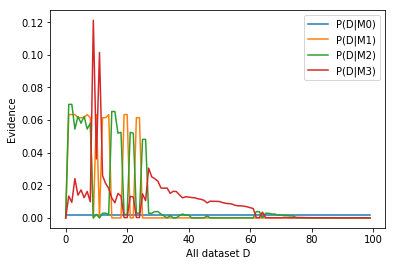

In [222]:
plt.figure()
plt.plot(evidence[0,L[0:100]],label = 'P(D|M0)')
plt.plot(evidence[1,L[0:100]],label = 'P(D|M1)')
plt.plot(evidence[2,L[0:100]],label = 'P(D|M2)')
plt.plot(evidence[3,L[0:100]],label = 'P(D|M3)')
plt.legend()
plt.xlabel('All dataset D')
plt.ylabel('Evidence')
plt.show()

In [205]:
def order_set(evidence):
    evidence = np.sum(evidence,axis=0)
    
    
    dist = np.zeros([evidence.shape[0],evidence.shape[0]])
    for i in range(dist.shape[0]):
        for j in range(dist.shape[1]):
            dist[i,j] = evidence[i] - evidence[j]
            if i == j:
                dist[i,j] = pow(10,4)

    L = [];
    D = np.arange(evidence.shape[0]).tolist()
    ind = evidence.argmin()
    L.append(ind)
    D.remove(ind)
    while D:
        N = []
        for i in range(len(D)):
            ind = dist[D[i],D].argmin()
            if D[ind]==L[-1]:
                N.append(D[ind])
        if not N:
            L.append(D[dist[L[-1],D].argmin()])
        else:
            L.append(N[dist[L[-1],N].argmin()])
        D.remove(L[-1])
    return L

In [206]:
## SUM
evidsun = np.sum(evidence,axis=1)
print(evidsun)

[1. 1. 1. 1.]


In [207]:
### argmin and argmax for M_1
M1_min = np.argmin(evidence[1,:])
M1_max = np.argmax(evidence[1,:])
M1_min_index = L.index(M1_min)
M1_max_index = L.index(M1_max)
#print(evidence[0,:])
print('\n')
print('Min in Model 1,index = ' + str(M1_min_index))
visualize_data(dataset[M1_min])
print('\n')
print('Max in Model 1,index = ' + str(M1_max_index))
visualize_data(dataset[M1_max])



Min in Model 1,index = 9
--------------
|xxx|
|xxx|
|xxx|
---------------


Max in Model 1,index = 12
--------------
|oxx|
|oxx|
|oxx|
---------------


In [208]:
### argmin and argmax for M_2
M2_min = np.argmin(evidence[2,:])
M2_max = np.argmax(evidence[2,:])
M2_min_index = L.index(M2_min)
M2_max_index = L.index(M2_max)
#print(evidence[0,:])
print('\n')
print('Min in Model 2, index =' + str(M2_min_index))
visualize_data(dataset[M2_min])
print('\n')
print('Max in Model 2, index =' + str(M2_max_index))
visualize_data(dataset[M2_max])



Min in Model 2, index =507
--------------
|xox|
|xxo|
|oxx|
---------------


Max in Model 2, index =16
--------------
|xxx|
|xxo|
|ooo|
---------------


In [209]:
### argmin and argmax for M_3
M3_min = np.argmin(evidence[3,:])
M3_max = np.argmax(evidence[3,:])
M3_min_index = L.index(M3_min)
M3_max_index = L.index(M3_max)
#print(evidence[0,:])
print('\n')
print('Min in Model 3, index = '+str(M3_min_index))
visualize_data(dataset[M3_min])
print('\n')
print('Max in Model 3, index = '+str(M3_max_index))
visualize_data(dataset[M3_max])



Min in Model 3, index = 403
--------------
|oxo|
|xxx|
|xoo|
---------------


Max in Model 3, index = 9
--------------
|xxx|
|xxx|
|xxx|
---------------


In [223]:
### larger sigma
sigma = 100000
mu = 0

evidence = np.zeros((4,512))
models = ['M0','M1','M2','M3']
num_sample = 10000
theta_M0 = generate_parameter(models[0],sigma,mu,num_sample)
theta_M1 = generate_parameter(models[1],sigma,mu,num_sample)
theta_M2 = generate_parameter(models[2],sigma,mu,num_sample)
theta_M3 = generate_parameter(models[3],sigma,mu,num_sample)
theta = [theta_M0,theta_M1,theta_M2,theta_M3]
for i in range(4) :
    for j in range(512):
        evidence[i][j] = compute_evidence(models[i],dataset[j],num_sample,theta[i])
L = order_set(evidence)
plt.figure()
plt.plot(evidence[0,L],label = 'P(D|M0)')
plt.plot(evidence[1,L],label = 'P(D|M1)')
plt.plot(evidence[2,L],label = 'P(D|M2)')
plt.plot(evidence[3,L],label = 'P(D|M3)')
plt.legend()
plt.xlabel('All dataset D')
plt.ylabel('Evidence')
plt.show()

plt.figure()
plt.plot(evidence[0,L[0:100]],label = 'P(D|M0)')
plt.plot(evidence[1,L[0:100]],label = 'P(D|M1)')
plt.plot(evidence[2,L[0:100]],label = 'P(D|M2)')
plt.plot(evidence[3,L[0:100]],label = 'P(D|M3)')
plt.legend()
plt.xlabel('All dataset D')
plt.ylabel('Evidence')
plt.show()

KeyboardInterrupt: 

In [ ]:
### smaller sigma
sigma = 1
mu = 0

evidence = np.zeros((4,512))
models = ['M0','M1','M2','M3']
num_sample = 10000
theta_M0 = generate_parameter(models[0],sigma,mu,num_sample)
theta_M1 = generate_parameter(models[1],sigma,mu,num_sample)
theta_M2 = generate_parameter(models[2],sigma,mu,num_sample)
theta_M3 = generate_parameter(models[3],sigma,mu,num_sample)
theta = [theta_M0,theta_M1,theta_M2,theta_M3]
for i in range(4) :
    for j in range(512):
        evidence[i][j] = compute_evidence(models[i],dataset[j],num_sample,theta[i])
L = order_set(evidence)
plt.figure()
plt.plot(evidence[0,L],label = 'P(D|M0)')
plt.plot(evidence[1,L],label = 'P(D|M1)')
plt.plot(evidence[2,L],label = 'P(D|M2)')
plt.plot(evidence[3,L],label = 'P(D|M3)')
plt.legend()
plt.xlabel('All dataset D')
plt.ylabel('Evidence')
plt.show()

plt.figure()
plt.plot(evidence[0,L[0:100]],label = 'P(D|M0)')
plt.plot(evidence[1,L[0:100]],label = 'P(D|M1)')
plt.plot(evidence[2,L[0:100]],label = 'P(D|M2)')
plt.plot(evidence[3,L[0:100]],label = 'P(D|M3)')
plt.legend()
plt.xlabel('All dataset D')
plt.ylabel('Evidence')
plt.show()

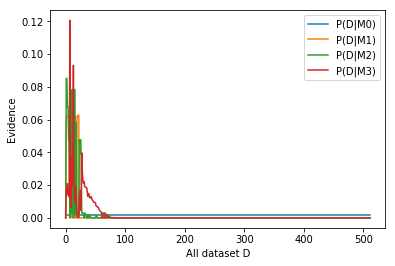

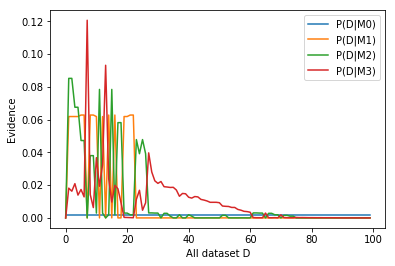

In [226]:
### mean become [5,5]
sigma = 1000
mu = 5

evidence = np.zeros((4,512))
models = ['M0','M1','M2','M3']
num_sample = 1000
theta_M0 = generate_parameter(models[0],sigma,mu,num_sample)
theta_M1 = generate_parameter(models[1],sigma,mu,num_sample)
theta_M2 = generate_parameter(models[2],sigma,mu,num_sample)
theta_M3 = generate_parameter(models[3],sigma,mu,num_sample)
theta = [theta_M0,theta_M1,theta_M2,theta_M3]
for i in range(4) :
    for j in range(512):
        evidence[i][j] = compute_evidence(models[i],dataset[j],num_sample,theta[i])
L = order_set(evidence)
plt.figure()
plt.plot(evidence[0,L],label = 'P(D|M0)')
plt.plot(evidence[1,L],label = 'P(D|M1)')
plt.plot(evidence[2,L],label = 'P(D|M2)')
plt.plot(evidence[3,L],label = 'P(D|M3)')
plt.legend()
plt.xlabel('All dataset D')
plt.ylabel('Evidence')
plt.show()

plt.figure()
plt.plot(evidence[0,L[0:100]],label = 'P(D|M0)')
plt.plot(evidence[1,L[0:100]],label = 'P(D|M1)')
plt.plot(evidence[2,L[0:100]],label = 'P(D|M2)')
plt.plot(evidence[3,L[0:100]],label = 'P(D|M3)')
plt.legend()
plt.xlabel('All dataset D')
plt.ylabel('Evidence')
plt.show()

In [229]:
### generate parameter with shift mu
def generate_parameter_non_diag(model,sigma,mu,num_sample):
    if model is 'M1':
        Sigma = sigma
        Mu = mu
        theta = np.random.normal(Mu, Sigma, num_sample)
        return theta
    elif model is 'M2':
        Sigma = np.array([[sigma,sigma],[sigma,sigma]])
        Mu = np.zeros(2) + mu
        theta = np.random.multivariate_normal(Mu, Sigma, num_sample)
        return theta
    elif model is 'M3':
        Sigma = np.array([[sigma,sigma,sigma],[sigma,sigma,sigma],[sigma,sigma,sigma]])
        Mu = np.zeros() + mu
        theta = np.random.multivariate_normal(Mu, Sigma, num_sample)
        return theta
    elif model is 'M0':
        return 0
    else :
        print('No such model!')
        return 

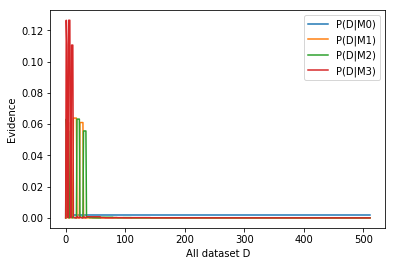

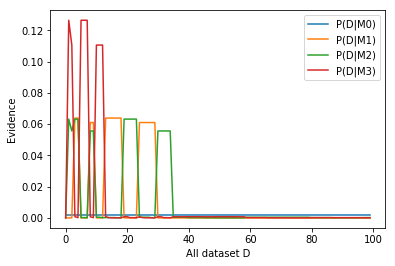

In [232]:
### mean become [5,5]
sigma = 1000
mu = 0

evidence = np.zeros((4,512))
models = ['M0','M1','M2','M3']
num_sample = 1000
theta_M0 = generate_parameter_non_diag(models[0],sigma,mu,num_sample)
theta_M1 = generate_parameter_non_diag(models[1],sigma,mu,num_sample)
theta_M2 = generate_parameter_non_diag(models[2],sigma,mu,num_sample)
theta_M3 = generate_parameter_non_diag(models[3],sigma,mu,num_sample)
theta = [theta_M0,theta_M1,theta_M2,theta_M3]
for i in range(4) :
    for j in range(512):
        evidence[i][j] = compute_evidence(models[i],dataset[j],num_sample,theta[i])
L = order_set(evidence)
plt.figure()
plt.plot(evidence[0,L],label = 'P(D|M0)')
plt.plot(evidence[1,L],label = 'P(D|M1)')
plt.plot(evidence[2,L],label = 'P(D|M2)')
plt.plot(evidence[3,L],label = 'P(D|M3)')
plt.legend()
plt.xlabel('All dataset D')
plt.ylabel('Evidence')
plt.show()

plt.figure()
plt.plot(evidence[0,L[0:100]],label = 'P(D|M0)')
plt.plot(evidence[1,L[0:100]],label = 'P(D|M1)')
plt.plot(evidence[2,L[0:100]],label = 'P(D|M2)')
plt.plot(evidence[3,L[0:100]],label = 'P(D|M3)')
plt.legend()
plt.xlabel('All dataset D')
plt.ylabel('Evidence')
plt.show()